In [64]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [65]:
df = pd.read_csv("cleaned.csv")
df.describe(include="all")

,Unnamed: 0,App,App Id,Category,Content Rating,Rating,Installs,Metric,Reviews,Price,...,Developer Id,Developer,Developer Address,RatingCategorized,InstallsCategorized,MetricCategorized,ReviewsCategorized,PriceCategorized,minimum incomeCategorized,SizeCategorized
count,6250.000000,6250,6250,6250,6250,6250.000000,6250.000000,6250.000000,6250.000000,6250.000000,...,6250,6250,6250,6250,6250,6250,6250,6250,6250,6250
unique,NaN,2970,4382,47,4,NaN,NaN,NaN,NaN,NaN,...,2367,3108,2081,3,2,4,3,2,2,5
top,NaN,bubble shoot,com.elsayad.bubbleshoot,tool,everyon,NaN,NaN,NaN,NaN,NaN,...,5.70e+18,google llc,"1600 amphitheatre parkway, mountain view 94043",Very High,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low
freq,NaN,282,12,783,5265,NaN,NaN,NaN,NaN,NaN,...,95,83,1827,4118,5469,5320,5128,5892,5892,2624
mean,3124.500000,NaN,NaN,NaN,NaN,0.831658,0.001764,0.001736,0.001665,0.000182,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1804.363923,NaN,NaN,NaN,NaN,0.076868,0.003581,0.003499,0.003214,0.000738,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,0.580000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1562.250000,NaN,NaN,NaN,NaN,0.765541,0.000002,0.000002,0.000001,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3124.500000,NaN,NaN,NaN,NaN,0.840868,0.000100,0.000095,0.000043,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,4686.750000,NaN,NaN,NaN,NaN,0.890314,0.002000,0.001856,0.000727,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
def show_types(df):
    for col in df.columns:
        print(col, "=", df[col][0], "=", type(df[col][0]))


show_types(df)

Unnamed: 0 = 0 = <class 'numpy.int64'>
App = minecraft = <class 'str'>
App Id = com.mojang.minecraftp = <class 'str'>
Category = arcad = <class 'str'>
Content Rating = everyone 10+ = <class 'str'>
Rating = 0.9111484 = <class 'numpy.float64'>
Installs = 0.002 = <class 'numpy.float64'>
Metric = 0.0046289883201103 = <class 'numpy.float64'>
Reviews = 0.0085714869305811 = <class 'numpy.float64'>
Price = 0.0031764456445644 = <class 'numpy.float64'>
Currency = usd = <class 'str'>
minimum income = 0.0006481591004325 = <class 'numpy.float64'>
Ad Supported = True = <class 'numpy.bool_'>
In app purchases = True = <class 'numpy.bool_'>
Size = 0.0253542472483757 = <class 'numpy.float64'>
Version = 1.16.221.01 = <class 'str'>
Last update = 21-apr-21 = <class 'str'>
Released = 15-aug-11 = <class 'str'>
Android version Text = varies with devic = <class 'str'>
Editor Choice = True = <class 'numpy.bool_'>
Developer Id = 4.77e+18 = <class 'str'>
Developer = mojang = <class 'str'>
Developer Address = moja

In [67]:
for col in df.columns:
    if df[col].dtype != "float64":
        df.drop(col, axis=1, inplace=True)

In [68]:
df.columns

Index(['Rating', 'Installs', 'Metric', 'Reviews', 'Price', 'minimum income',
       'Size'],
      dtype='object')

In [69]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  s

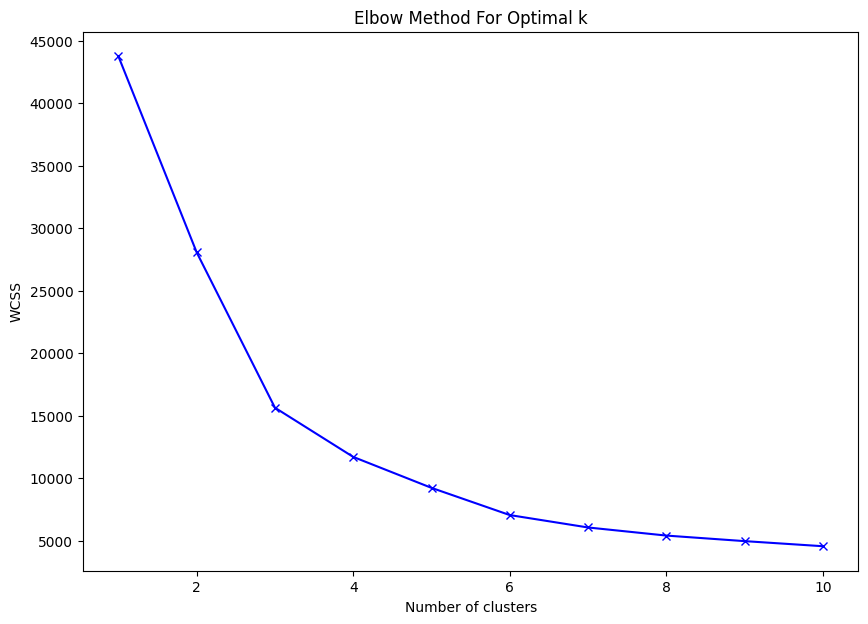

In [70]:
wcss = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method result
plt.figure(figsize=(10, 7))
plt.plot(K, wcss, "bx-")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method For Optimal k")
plt.show()

In [77]:
k = 3


kmeans = KMeans(n_clusters=k, random_state=42)


kmeans.fit(df_scaled)

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [78]:
df["Cluster"] = kmeans.labels_

In [79]:
silhouette_avg = silhouette_score(df_scaled, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg} for k = {k}")

Silhouette Score: 0.6167610394880471 for k = 3


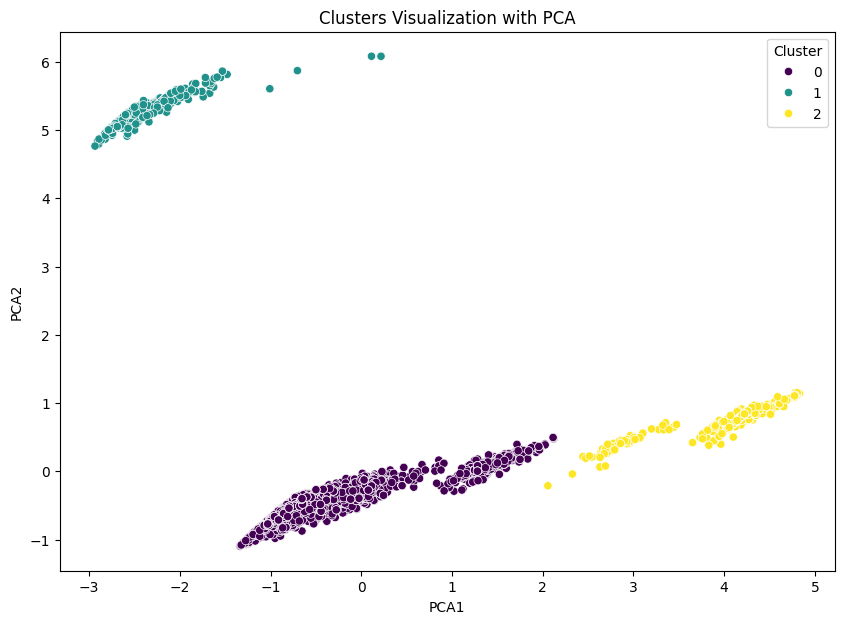

In [81]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(df_pca, columns=["PCA1", "PCA2"])
df_pca["Cluster"] = df["Cluster"]

plt.figure(figsize=(10, 7))
sns.scatterplot(x="PCA1", y="PCA2", hue="Cluster", palette="viridis", data=df_pca)
plt.title("Clusters Visualization with PCA")
plt.show()

In [84]:
for i in range(k):
    print(f"Cluster{i}")
    print(df["Cluster"].describe(include="all"))

Cluster0
count    6250.00000
mean        0.30720
std         0.68031
min         0.00000
25%         0.00000
50%         0.00000
75%         0.00000
max         2.00000
Name: Cluster, dtype: float64
Cluster1
count    6250.00000
mean        0.30720
std         0.68031
min         0.00000
25%         0.00000
50%         0.00000
75%         0.00000
max         2.00000
Name: Cluster, dtype: float64
Cluster2
count    6250.00000
mean        0.30720
std         0.68031
min         0.00000
25%         0.00000
50%         0.00000
75%         0.00000
max         2.00000
Name: Cluster, dtype: float64


In [88]:
# Group the original DataFrame by the cluster labels to inspect each cluster's data
clusters = df.groupby("Cluster")

# Get the summary statistics for each cluster
cluster_summaries = {}
for cluster_num, cluster_data in clusters:
    cluster_summaries[cluster_num] = cluster_data.describe(include="all")

# Print the summary statistics for each cluster
for cluster_num, summary in cluster_summaries.items():
    print(f"Cluster {cluster_num} Summary:")
    print(summary)
    summary.to_csv(f"clstrno{cluster_num}summary.csv")
    print("\n")

Cluster 0 Summary:
            Rating     Installs       Metric       Reviews   Price  \
count  5111.000000  5111.000000  5111.000000  5.111000e+03  5111.0   
mean      0.827986     0.000463     0.000467  8.396835e-04     0.0   
std       0.078231     0.000736     0.000756  2.283087e-03     0.0   
min       0.580000     0.000000     0.000000  0.000000e+00     0.0   
25%       0.762187     0.000002     0.000002  6.501995e-07     0.0   
50%       0.834635     0.000020     0.000021  2.131209e-05     0.0   
75%       0.889036     0.001000     0.000925  3.075564e-04     0.0   
max       1.000000     0.002000     0.004169  8.571487e-03     0.0   

       minimum income         Size  Cluster  
count          5111.0  5111.000000   5111.0  
mean              0.0     0.017798      0.0  
std               0.0     0.014202      0.0  
min               0.0     0.000000      0.0  
25%               0.0     0.005354      0.0  
50%               0.0     0.015445      0.0  
75%               0.0     0.